In [1]:
# core stuff
import numpy as np
import pickle as pk
from copy import deepcopy

# plotting stuff
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
%matplotlib notebook

# Ensure that changes in imported module (gravann most importantly) are autoreloaded
%load_ext autoreload
%autoreload 2


In [2]:
# Load all data (produced using mascon_models.cpp benchmark)
with open("data/bennu_mascon.pk", "rb") as file:
    p_bennu, m_bennu, n_bennu = pk.load(file)
with open("data/bennu_one_year_5000.pk", "rb") as file:
    x_bennu_long = pk.load(file)
with open("data/bennu_one_week_1000.pk", "rb") as file:
    x_bennu = pk.load(file)

with open("data/itokawa_mascon.pk", "rb") as file:
    p_ito, m_ito, n_ito = pk.load(file)
with open("data/ito_one_year_5000.pk", "rb") as file:
    x_ito_long = pk.load(file)
with open("data/ito_one_week_1000.pk", "rb") as file:
    x_ito = pk.load(file)

In [3]:
# Getting the inertial coordinates (bennu)
w_bennu = 1.5633255034258877
t_bennu = np.linspace(0,86400. * 7. / 3842.6367987779804,1001)
x_bennu_i =  deepcopy(x_bennu)
x_bennu_i[:,0] = np.cos(t_bennu*w_bennu) * x_bennu[:,0] - np.sin(t_bennu*w_bennu) * x_bennu[:,1]
x_bennu_i[:,1] = + np.sin(t_bennu*w_bennu) * x_bennu[:,0] + np.cos(t_bennu*w_bennu) * x_bennu[:,1]

# Getting the inertial coordinates (itokawa)
# Getting the inertial coordinates (bennu)
w_ito = 0.9830980174940738
t_ito = np.linspace(0,24*60*60.*7/6833.636194780773,1001)
x_ito_i =  deepcopy(x_ito)
x_ito_i[:,0] = np.cos(t_ito*w_ito) * x_ito[:,0] - np.sin(t_ito*w_ito) * x_ito[:,1]
x_ito_i[:,1] = + np.sin(t_ito*w_ito) * x_ito[:,0] + np.cos(t_ito*w_ito) * x_ito[:,1]


<IPython.core.display.Javascript object>


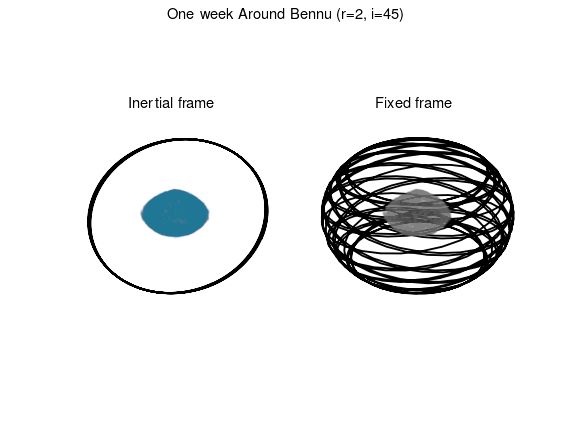

Text(0.5, 0.98, 'One week Around Bennu (r=2, i=45)')

In [4]:
D = 1.3
fig = plt.figure()
p_bennu_r = deepcopy(p_bennu)
theta = np.random.random((len(p_bennu),)) * 2*np.pi

# Plot in inertial frame
ax = fig.add_subplot(121, projection='3d')
ax.plot(x_bennu_i[:,0], x_bennu_i[:,1], x_bennu_i[:,2], 'k')
p_bennu_r[:,0] = p_bennu[:,0] * np.cos(theta) + p_bennu[:,1] * np.sin(theta)
p_bennu_r[:,1] = - p_bennu[:,0] * np.sin(theta) + p_bennu[:,1] * np.cos(theta)
ax.scatter(p_bennu_r[:,0], p_bennu_r[:,1], p_bennu_r[:,2], s=3, alpha=0.03)
ax.scatter(p_bennu[:,0], p_bennu[:,1], p_bennu[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Inertial frame')

# Plot in rotating frame
ax = fig.add_subplot(122, projection='3d')
ax.plot(x_bennu[:,0], x_bennu[:,1], x_bennu[:,2], 'k')
ax.scatter(p_bennu[:,0], p_bennu[:,1], p_bennu[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Fixed frame')


fig.suptitle("One week Around Bennu (r=2, i=45)", fontsize=12)

<IPython.core.display.Javascript object>


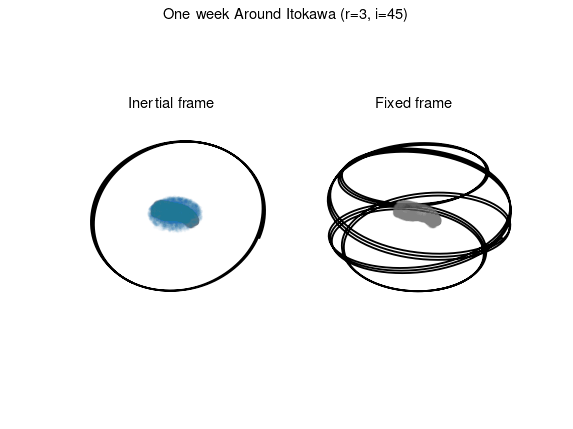

Text(0.5, 0.98, 'One week Around Itokawa (r=3, i=45)')

In [5]:
D = 2
fig = plt.figure()
p_ito_r = deepcopy(p_ito)
theta = np.random.random((len(p_ito),)) * 2*np.pi


# Plot in inertial frame
ax = fig.add_subplot(121, projection='3d')
ax.plot(x_ito_i[:,0], x_ito_i[:,1], x_ito_i[:,2], 'k')
p_ito_r[:,0] = p_ito[:,0] * np.cos(theta) + p_ito[:,1] * np.sin(theta)
p_ito_r[:,1] = - p_ito[:,0] * np.sin(theta) + p_ito[:,1] * np.cos(theta)
ax.scatter(p_ito[:,0], p_ito[:,1], p_ito[:,2], s=3, alpha=0.03, c='gray')
ax.scatter(p_ito_r[:,0], p_ito_r[:,1], p_ito_r[:,2], s=3, alpha=0.03)
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Inertial frame')


# Plot in rotating frame
ax = fig.add_subplot(122, projection='3d')
ax.plot(x_ito[:,0], x_ito[:,1], x_ito[:,2], 'k')
ax.scatter(p_ito[:,0], p_ito[:,1], p_ito[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Fixed frame')


fig.suptitle("One week Around Itokawa (r=3, i=45)", fontsize=12)

<IPython.core.display.Javascript object>


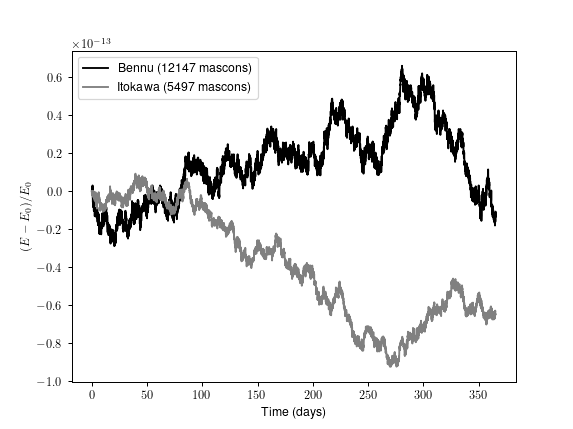

Text(0, 0.5, '$(E-E_0) / E_0$')

In [6]:
fig = plt.figure()
plt.plot(np.linspace(0, 365.25,5001), x_bennu_long[:,-1]-x_bennu_long[0,-1], 'k', label = "Bennu (12147 mascons)")
plt.plot(np.linspace(0, 365.25,5001), x_ito_long[:,-1]-x_ito_long[0,-1], 'gray', label = "Itokawa (5497 mascons)")
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("$(E-E_0) / E_0$")
